In [2]:
from contextlib import suppress

with suppress(Exception):import numpy as np
import keras
from keras.datasets import mnist

In [3]:
# Load the datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

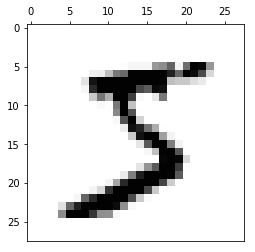

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)

imgplot = ax.imshow(X_train[0], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')

ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

pyplot.show()

In [6]:
#Feed-Forward FC-NN (Fully Connected Neural Network) for a classification task
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
#we apply the to_categorical function from keras.utilis to convert integer labels to one-hot-vectors.
from keras.datasets import mnist
from keras.utils import np_utils

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s - loss: 0.3339 - acc: 0.9019 - val_loss: 0.2655 - val_acc: 0.9242
Epoch 2/10
60000/60000 [==============================] - 10s - loss: 0.3084 - acc: 0.9100 - val_loss: 0.2509 - val_acc: 0.9265
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.2936 - acc: 0.9151 - val_loss: 0.2368 - val_acc: 0.9324
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.2769 - acc: 0.9202 - val_loss: 0.2246 - val_acc: 0.9350
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.2619 - acc: 0.9239 - val_loss: 0.2146 - val_acc: 0.9392
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.2499 - acc: 0.9275 - val_loss: 0.2047 - val_acc: 0.9412
Epoch 7/10
60000/60000 [==============================] - 13s - loss: 0.2391 - acc: 0.9311 - val_loss: 0.1971 - val_acc: 0.9433
Epoch 8/10
60000/60000 [==============================

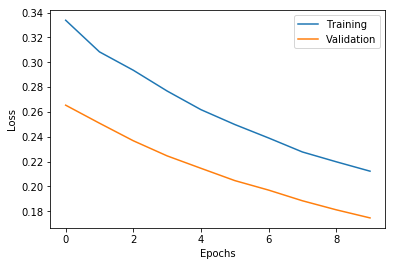

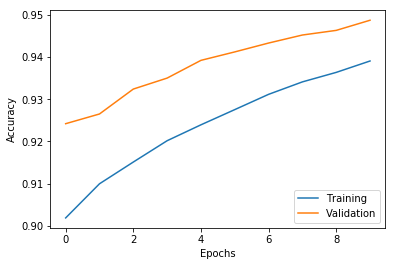

In [14]:
#Plotting Network Performance Trend
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(network_history.history['loss'])
plt.plot(network_history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(network_history.history['acc'])
plt.plot(network_history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [16]:
#If you continue training, at some point the validation loss will start to increase: that is when the model 
#starts to **overfit**. 

#It is always necessary to monitor training and validation loss during the training of any kind of Neural 
#Network, either to detect overfitting or to evaluate the behaviour of the model 
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=10, 
          batch_size=128, verbose=True, callbacks=[early_stop]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s - loss: 1.2022 - acc: 0.6855 - val_loss: 0.5391 - val_acc: 0.8686
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.5318 - acc: 0.8492 - val_loss: 0.3784 - val_acc: 0.8980
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.4284 - acc: 0.8753 - val_loss: 0.3268 - val_acc: 0.9089
Epoch 4/10
60000/60000 [==============================] - 12s - loss: 0.3792 - acc: 0.8898 - val_loss: 0.2953 - val_acc: 0.9172
Epoch 5/10
60000/60000 [==============================] - 11s - loss: 0.3448 - acc: 0.8987 - val_loss: 0.2730 - val_acc: 0.9236
Epoch 6/10
60000/60000 [==============================] - 13s - loss: 0.3214 - acc: 0.9063 - val_loss: 0.2571 - val_acc: 0.9269
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.3024 - acc: 0.9118 - val_loss: 0.2432 - val_acc: 0.9312
Epoch 8/10
60000/60000 [==============================